# Gom dữ liệu


In [ ]:
repo_link = [
    "https://github.com/uyenbhku/handwritten_digits",
    "https://github.com/Sang-UIT/CS114",
    "https://github.com/phamthanhlam0201/Hand_written_degits",
    "https://github.com/KiRzEa/CS114",
    "https://github.com/thuynguyen2003/CS114-MachineLearning",
    "https://github.com/NgKhTr/HandwrittenDigitDataset",
    "https://github.com/TruongNoDame/Create-handwriting",
    "https://github.com/Tlon9/CS114",
    "https://github.com/kiendoo4/hand_written_digits",
    "https://github.com/phongidoit/CS114",
    "https://github.com/hoangnqh/CS114.N21",
    "https://github.com/dnsang1611/CS114.N21-KHNT",

    "https://github.com/khanh232002/hand-written-digits",
    "https://github.com/npk7264/hand-written-digits",
    "https://github.com/HungStark/handwritten_digits"
]

folder_name = [
    "dataset",
    "hand_written_digits",
    "Hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits",
    "hand_written_digits"
]

*Clone data từ github về thư mục Data_Clone*

In [ ]:
import os
import shutil

os.mkdir("Data_Clone")

for i, link in enumerate(repo_link):
    path = os.path.join("./Data_Clone", "Data_" + str(i))
    os.mkdir(path)
    !git clone {link} {path}

for i in range(len(folder_name)):
    path = os.path.join("./Data_Clone", "Data_" + str(i))
    folder_path = os.path.join(path, folder_name[i])
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    for subfolder in subfolders:
        shutil.move(subfolder, path)

    shutil.rmtree(folder_path)

Cloning into './Data_Clone/Data_0'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 213 (delta 25), reused 107 (delta 19), pack-reused 93
Receiving objects: 100% (213/213), 73.88 MiB | 38.76 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Cloning into './Data_Clone/Data_1'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 308 (delta 62), reused 191 (delta 49), pack-reused 70
Receiving objects: 100% (308/308), 45.58 MiB | 35.07 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Cloning into './Data_Clone/Data_2'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (128/128), 39.69 MiB | 35.22 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Cloning into 

*Tạo thư mục dataset là nơi chứa toàn bộ data*

In [ ]:
os.mkdir("./Dataset")

for i in range(10):
  os.mkdir(os.path.join("./Dataset", str(i)))

*Đưa tất cả data về từng thư mục của nó, tất cả những số 0, 1, 2..., 9 ở Data_Clone đều được phân loại rõ ràng và đưa về lại Dataset*

In [ ]:
root = "./Data_Clone"

for i in os.listdir(root):
  folder_path = os.path.join(root, i)
  for i in range(10):
    number_folder_path = os.path.join(folder_path, str(i))
    dest_folder = os.path.join('./Dataset/', str(i))
    if os.path.exists(number_folder_path):
      count = len(os.listdir(dest_folder))
      for filename in os.listdir(number_folder_path):
        source_path = os.path.join(number_folder_path, filename)
        new_name = "image_" + str(count) + ".jpg"
        dest_path = os.path.join(dest_folder, new_name)
        shutil.move(source_path, dest_path)
        count += 1

*Đọc toàn bộ ảnh từ Dataset và lưu trữ lại*

In [ ]:
import cv2

data = []
labels = []

for i in range (0, 10):
  path = './Dataset/' + str(i)
  for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    img = cv2.imread(file_path)
    img = cv2.resize(img, (64, 64))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 0)

    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                cv2.THRESH_BINARY,11,2)

    data.append(img)
    labels.append(i)

In [ ]:
import numpy as np
import random

data = np.array(data)
data.shape

(1482, 64, 64)

In [ ]:
nsamples, nx, ny = data.shape
data = data.reshape((nsamples,nx*ny))

In [ ]:
data.shape

(1482, 4096)

#Training

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV

in thử 6 dữ liệu đầu trong data

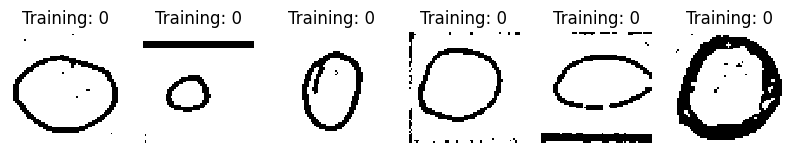

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, data, labels):
    ax.set_axis_off()
    image = image.reshape(64, 64)
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, shuffle=True
)

# Mô hình trong bài ví dụ của sklearn
# clf = svm.SVC(gamma=0.001)

# Mô hình của nhóm
clf = LogisticRegression(solver="saga")

#Mô hình SGDClassifier
# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Learn the digits on the train subset

# sgd_clf.fit(X_train, y_train)

clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


in thử 6 hình ảnh được dự đoán

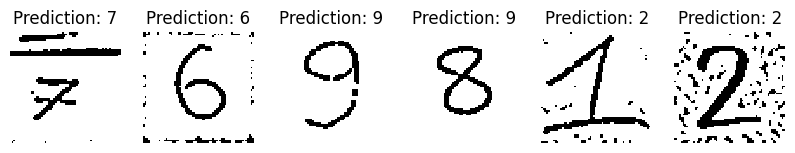

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(64, 64)
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression(solver='saga'):
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.52      0.65      0.58        26
           2       0.65      0.71      0.68        31
           3       0.56      0.59      0.57        34
           4       0.67      0.67      0.67        27
           5       0.60      0.58      0.59        31
           6       0.77      0.62      0.69        37
           7       0.65      0.71      0.68        24
           8       0.82      0.56      0.67        32
           9       0.48      0.46      0.47        26

    accuracy                           0.63       297
   macro avg       0.64      0.63      0.63       297
weighted avg       0.64      0.63      0.63       297




Confusion matrix:
[[22  0  1  1  0  2  0  0  0  3]
 [ 1 17  2  0  0  2  0  0  0  4]
 [ 1  2 22  2  1  1  0  0  1  1]
 [ 1  2  1 20  2  3  0  3  0  2]
 [ 1  2  1  0 18  1  3  0  1  0]
 [ 3  1  0  3  1 18  2  1  0  2]
 [ 3  2  2  1  2  2 23  2  0  0]
 [ 0  2  1  1  2  0  0 17  1  0]
 [ 0  3  2  5  0  1  0  2 18  1]
 [ 2  2  2  3  1  0  2  1  1 12]]


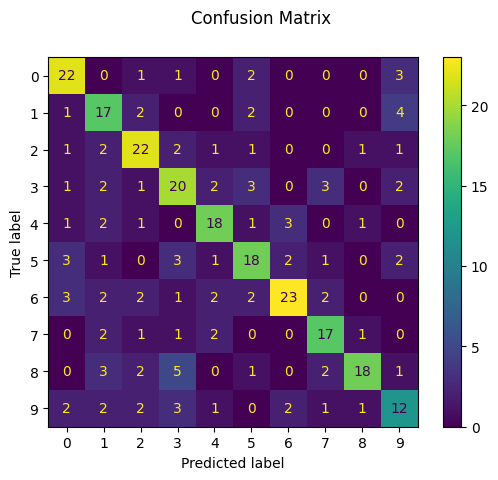

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

in ra 25 kết quả dự đoán sai để xem

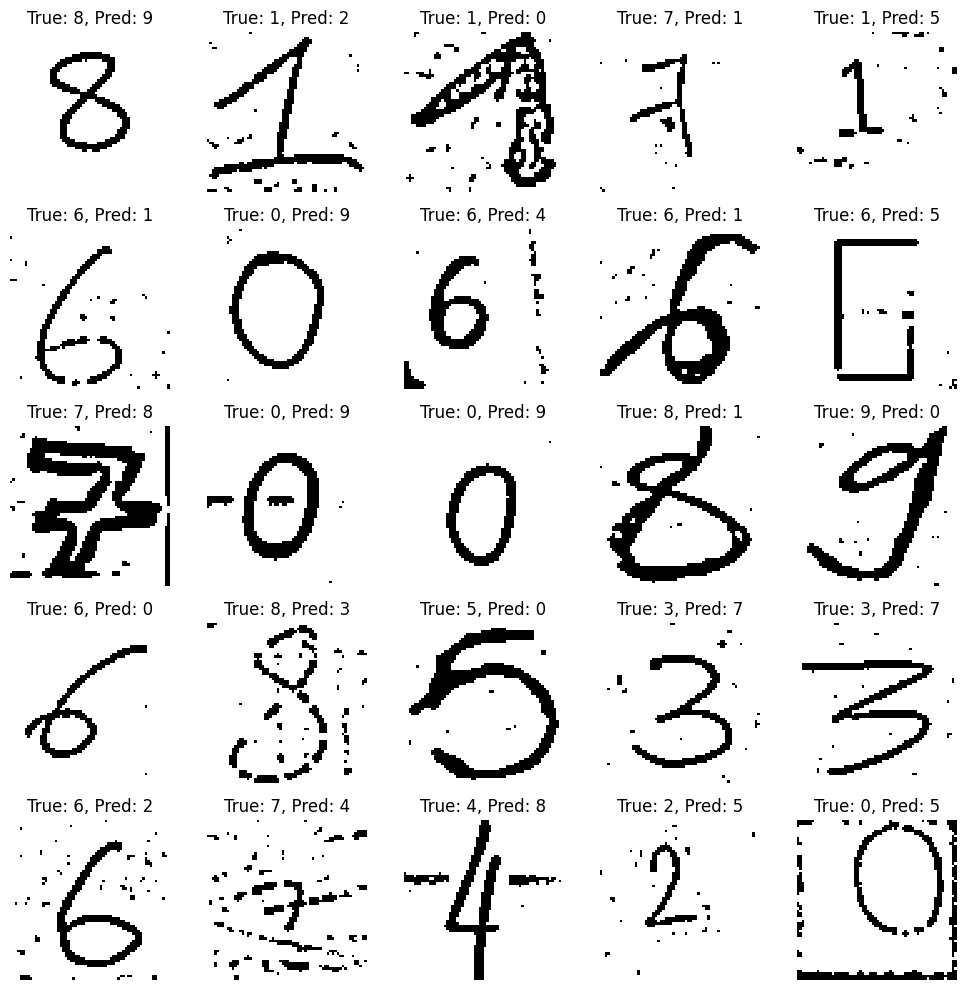

In [ ]:
mis = []
for i in range(0, len(X_test)):
  if (y_test[i] != predicted[i]):
    mis.append(i)

grid_rows = 5
grid_cols = 5
num_images = grid_rows * grid_cols
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
          image = X_test[mis[i]].reshape(64, 64)
          true_label = y_test[mis[i]]
          predicted_label = predicted[mis[i]]

          ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
          ax.set_title(f"True: {true_label}, Pred: {predicted_label}")
          ax.axis('off')
plt.tight_layout()
plt.show()

#Nhận xét:
Trong tập dữ liệu có nhiều bạn dùng giấy có ô li để viết, nét chữ mỗi bạn dùng cũng to nhỏ khác nhau. Điều này ảnh hưởng đến kết quả của mô hình.